# This notebook is to systemically evaluate network subselection and its effect on embedding and ML to predict impact/non-impact genes

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import os
import seaborn as sns
import networkx as nx
from src.eda.subset_network import *
from src.eda.eda_functions import *
from src.eda.process_phenotype import *
from src.embedding.network_embedding import network_embedding
from src.models.feature_extraction import *
from src.models.ML_functions import *
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sys import platform 
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'

In [38]:
start = time.time()
tom_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)
end = time.time()
print(f'time delta: {end-start} seconds')

time delta: 373.67288160324097 seconds


## Subset network method 1: choose the nodes from a non-DE module (e.g. 0, 1, 2, 3 or others) and top n DE from module 4

In [94]:
start = time.time()
for gene_num in [75,100]:
    for weight in [0.015, 0.02]:
        module0_n_4_df = get_subnetwork1(0, gene_num, weight, tom_df, output_dir = r'C:\Users\bbche\Documents\GitRepos\assist\data\module0_n_4')
end = time.time()
print(f'time delta: {end-start} seconds')

Number of edges: 73272
Figure num_genes=75,min_weight=0.015 has been saved.
Number of edges: 51662
Figure num_genes=75,min_weight=0.02 has been saved.
Number of edges: 94166
Figure num_genes=100,min_weight=0.015 has been saved.
Number of edges: 66820
Figure num_genes=100,min_weight=0.02 has been saved.
time delta: 64.7409451007843 seconds


In [70]:
start = time.time()
for gene_num in [125, 150]:
    for weight in [0.01, 0.015]:
        module1_n_4_df = get_subnetwork1(1, gene_num, weight, tom_df, output_dir = r'C:\Users\bbche\Documents\GitRepos\assist\data\module1_n_4')
end = time.time()
print(f'time delta: {end-start} seconds')

Number of edges: 82325
Figure num_genes=125,min_weight=0.01 has been saved.
Number of edges: 46303
Figure num_genes=125,min_weight=0.015 has been saved.
Number of edges: 98740
Figure num_genes=150,min_weight=0.01 has been saved.
Number of edges: 54897
Figure num_genes=150,min_weight=0.015 has been saved.
time delta: 101.95783853530884 seconds


In [71]:
start = time.time()
for gene_num in [125, 150]:
    for weight in [0.01, 0.015]:
        module2_n_4_df = get_subnetwork1(2, gene_num, weight, tom_df, output_dir = r'C:\Users\bbche\Documents\GitRepos\assist\data\module2_n_4')
end = time.time()
print(f'time delta: {end-start} seconds')

Number of edges: 57056
Figure num_genes=125,min_weight=0.01 has been saved.
Number of edges: 29758
Figure num_genes=125,min_weight=0.015 has been saved.
Number of edges: 74113
Figure num_genes=150,min_weight=0.01 has been saved.
Number of edges: 39244
Figure num_genes=150,min_weight=0.015 has been saved.
time delta: 89.0810194015503 seconds


In [60]:
start = time.time()
for gene_num in [125, 150]:
    for weight in [0.02, 0.025]:
        module3_n_4_df = get_subnetwork1(3, gene_num, weight, tom_df, output_dir = r'C:\Users\bbche\Documents\GitRepos\assist\data\module3_n_4')
end = time.time()
print(f'time delta: {end-start} seconds')

Number of edges: 76334
Figure num_genes=125,min_weight=0.02 has been saved.
Number of edges: 60395
Figure num_genes=125,min_weight=0.025 has been saved.
Number of edges: 89152
Figure num_genes=150,min_weight=0.02 has been saved.
Number of edges: 70175
Figure num_genes=150,min_weight=0.025 has been saved.
time delta: 75.8434157371521 seconds


## Subset network method 2: choose the nodes from module 4 (DE module) and by changing the gene_num and min_weight, the nodes from module 4 could pull nodes from other modules if the weights are large enough

In [95]:
start = time.time()
for gene_num in [200,250]:
    for weight in [0.008,0.01]:
        module4_df = get_subnetwork2(gene_num, weight, tom_df, output_dir = r'C:\Users\bbche\Documents\GitRepos\assist\data\module_4')
end = time.time()
print(f'time delta: {end-start} seconds')

Number of edges: 64975
Figure num_genes=200,min_weight=0.008 has been saved.
Number of edges: 50196
Figure num_genes=200,min_weight=0.01 has been saved.
Number of edges: 82208
Figure num_genes=250,min_weight=0.008 has been saved.
Number of edges: 63583
Figure num_genes=250,min_weight=0.01 has been saved.
time delta: 93.00227165222168 seconds


# Run embedding on "pre-selected" parameters to subselect the network based on the histograms and # of edges obtained

In [75]:
G0_n_4, module0_n_4_df = get_subnetwork1(0, 100, 0.015, plot_hist = False)
G1_n_4, module1_n_4_df = get_subnetwork1(1, 125, 0.01, plot_hist = False)
G2_n_4, module2_n_4_df = get_subnetwork1(2, 150, 0.01, plot_hist = False)
G3_n_4, module3_n_4_df = get_subnetwork1(3, 150, 0.02, plot_hist = False)
G4, module4_df = get_subnetwork2(250, 0.008, plot_hist = False)

Number of edges: 94166
Number of edges: 82325
Number of edges: 74113
Number of edges: 89152
Number of edges: 82208


## The time to run embedding is shown below highlighted pink. ~ 20-40 min for each embedding

In [76]:
subnetwork_names = ['m0_4_100_0.015','m1_4_125_0.01','m2_4_150_0.01','m3_4_150_0.02','m4_250_0.008']
for i, G in enumerate([G0_n_4,G1_n_4, G2_n_4, G3_n_4, G4]):
    emb_df = network_embedding(G, 16, 100, 10, 'C:/Users/bbche/Documents/GitRepos/assist/data/embedding_Dec17', subnetwork_names[i]) # use the network with 5k edges as a test (less computationally intensive)

Computing transition probabilities:   0%|      | 1/7510 [00:00<22:59,  5.44it/s]

embedding data saved


Computing transition probabilities:   0%|              | 0/5973 [00:00<?, ?it/s]

embedding data saved


Computing transition probabilities:   0%|      | 1/4333 [00:00<11:13,  6.43it/s]

embedding data saved


Computing transition probabilities:   0%|              | 0/3908 [00:00<?, ?it/s]

embedding data saved


Generating walks (CPU: 1): 100%|██████████████| 100/100 [09:49<00:00,  5.90s/it]


embedding data saved


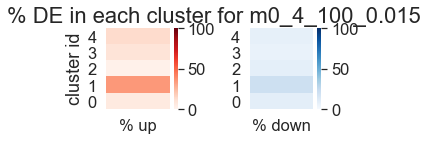

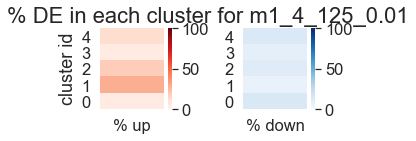

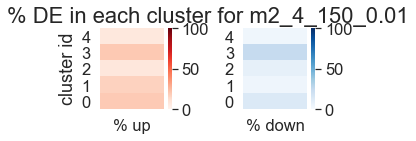

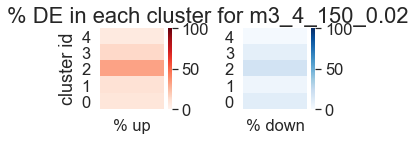

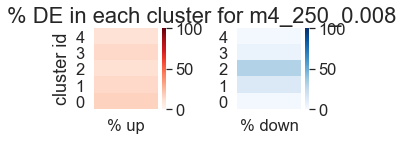

In [4]:
file_path = 'C:/Users/bbche/Documents/GitRepos/assist/data/embedding_Dec17/'
subnetwork_names = ['m0_4_100_0.015','m1_4_125_0.01','m2_4_150_0.01','m3_4_150_0.02','m4_250_0.008']
emb_list = []
kmeans_list = []
i = 0
for file in os.listdir(file_path):
    emb = pd.read_csv(file_path + file, index_col = 0)
    emb_list.append(emb)
    kmeans_list.append(run_kmeans(emb, 5))
    cluster_DE_perc(kmeans_list[i], 'kmean_label', subnetwork_names[i])
    i += 1

In [5]:
# process embedding to be ready for ML
processed_emb_dfs = list(map(process_emb_for_ML, emb_list))

In [83]:
## Could use test-harness to run ML but harder to re-use the same models to extract feature importances so I used sklearn models directly instead
# th_path = 'F:/data/emb_ML_Dec17'
# feature_cols = processed_emb_dfs[0].columns[:64].tolist()
# for i, emb_df in enumerate(processed_emb_dfs):
#     emb_df['index_col'] = range(len(emb_df))
#     run_test_harness_ml(emb_df, output_dir=th_path, description=subnetwork_names[i],feature_cols_to_use=feature_cols, 
#            models_to_test = [logistic_classifier, random_forest_classification, gradient_boosted_tree], 
#            feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None)
# plot_ML_results(th_path, subnetwork_names)


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 14:35:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.01 seconds


C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:35:14. Total run time = 0.11 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.99 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:16. Total run time = 1.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.93 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:21. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:35:21. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.96 seconds
Testing time was: 0.18 seconds
Run finished at 14:35:23. Total run time = 1.34 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.49 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:28. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:29. Total run time = 0.24 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.13 seconds
Testing time was: 0.12 seconds
Run finished at 14:35:30. Total run time = 1.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.74 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:35. Total run time = 4.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:35. Total run time = 0.13 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:37. Total run time = 1.41 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.25 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:43. Total run time = 0.13 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds
Testing time was: 0.13 seconds
Run finished at 14:35:45. Total run time = 1.40 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.10 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:50. Total run time = 5.22 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:50. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.97 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:52. Total run time = 1.37 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.82 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:57. Total run time = 5.05 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.02 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:57. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.93 seconds
Testing time was: 0.12 seconds
Run finished at 14:35:59. Total run time = 1.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.31 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:05. Total run time = 0.26 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds
Testing time was: 0.15 seconds
Run finished at 14:36:06. Total run time = 1.20 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.44 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:12. Total run time = 5.69 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.89 seconds
Testing time was: 0.16 seconds
Run finished at 14:36:13. Total run time = 1.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.08 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:19. Total run time = 5.32 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.98 seconds
Testing time was: 0.14 seconds
Run finished at 14:36:20. Total run time = 1.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.92 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:27. Total run time = 6.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:27. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.80 seconds
Testing time was: 0.15 seconds
Run finished at 14:36:28. Total run time = 1.10 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.07 seconds
Testing time was: 0.02 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:36:34. Total run time = 0.25 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.09 seconds
Testing time was: 0.17 seconds
Run finished at 14:36:36. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.75 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:41. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds
Testing time was: 0.16 seconds
Run finished at 14:36:43. Total run time = 1.57 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.35 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:48. Total run time = 5.65 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:49. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.99 seconds
Testing time was: 0.17 seconds
Run finished at 14:36:50. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.03 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:56. Total run time = 5.29 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:56. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds
Testing time was: 0.13 seconds
Run finished at 14:36:57. Total run time = 1.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.33 seconds
Testing time was: 0.02 seconds
Run finished at 14:37:03. Total run time = 5.62 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:04. Total run time = 0.26 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.16 seconds
Run finished at 14:37:05. Total run time = 1.45 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.34 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:11. Total run time = 0.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.12 seconds
Testing time was: 0.17 seconds
Run finished at 14:37:13. Total run time = 1.50 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.42 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:18. Total run time = 4.68 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:18. Total run time = 0.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.10 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:19. Total run time = 1.42 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.58 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:24. Total run time = 4.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.23 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:27. Total run time = 1.68 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.38 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:31. Total run time = 4.70 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:32. Total run time = 0.18 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.16 seconds
Testing time was: 0.13 seconds
Run finished at 14:37:33. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 3.93 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:38. Total run time = 4.27 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:38. Total run time = 0.18 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.11 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:39. Total run time = 1.49 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.16 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:44. Total run time = 4.28 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:44. Total run time = 0.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.06 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:46. Total run time = 1.43 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.11 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:50. Total run time = 4.43 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:51. Total run time = 0.30 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.20 seconds
Testing time was: 0.26 seconds
Run finished at 14:37:53. Total run time = 1.89 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.52 seconds
Testing time was: 0.02 seconds
Run finished at 14:37:58. Total run time = 4.79 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:58. Total run time = 0.23 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.07 seconds
Testing time was: 0.18 seconds
Run finished at 14:38:00. Total run time = 1.54 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.39 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:04. Total run time = 4.66 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:05. Total run time = 0.27 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.19 seconds
Run finished at 14:38:06. Total run time = 1.52 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.37 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:11. Total run time = 4.53 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:11. Total run time = 0.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.03 seconds
Testing time was: 0.17 seconds
Run finished at 14:38:13. Total run time = 1.49 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.44 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:18. Total run time = 4.77 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:38:18. Total run time = 0.23 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds
Testing time was: 0.13 seconds
Run finished at 14:38:20. Total run time = 1.40 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.13 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:25. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:26. Total run time = 0.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.17 seconds
Run finished at 14:38:27. Total run time = 1.57 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.51 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:33. Total run time = 5.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:34. Total run time = 0.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.12 seconds
Testing time was: 0.15 seconds
Run finished at 14:38:36. Total run time = 1.60 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.99 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:42. Total run time = 6.31 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:42. Total run time = 0.19 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds
Testing time was: 0.14 seconds
Run finished at 14:38:44. Total run time = 1.32 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 6.13 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:50. Total run time = 6.48 seconds
^^^^^^^^^^^

In [6]:
# subnetwork_names = ['m0_4_100_0.015','m1_4_125_0.01','m2_4_150_0.01','m3_4_150_0.02','m4_250_0.008']
output_dirs = [f'../../data/{subnetwork_names[i]}/' for i in range(len(subnetwork_names))]

# Run ML on each embedding (5 embedding total), 3 models each and each model was repeated 3 times so a total of 5 x 3 x 3 = 45 results

 model saved
 model saved
 model saved
lr average: 0.73 ;  rf average: 0.76 ;  xgb_average: 0.73


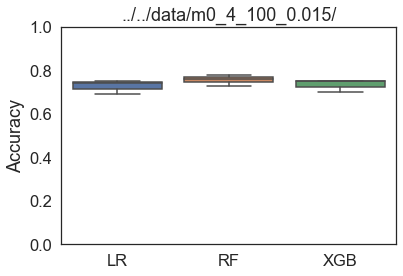

 model saved
 model saved
 model saved
lr average: 0.65 ;  rf average: 0.74 ;  xgb_average: 0.72


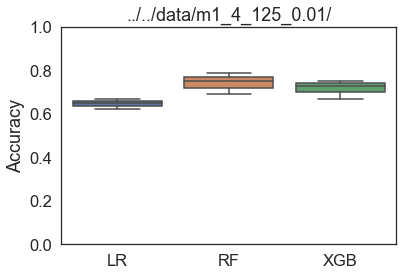

 model saved
 model saved
 model saved
lr average: 0.62 ;  rf average: 0.64 ;  xgb_average: 0.6


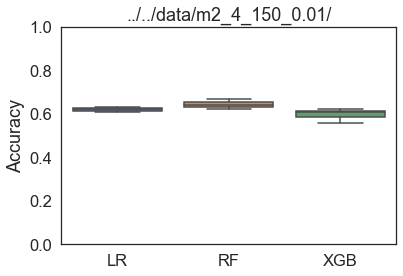

 model saved
 model saved
 model saved
lr average: 0.7 ;  rf average: 0.72 ;  xgb_average: 0.69


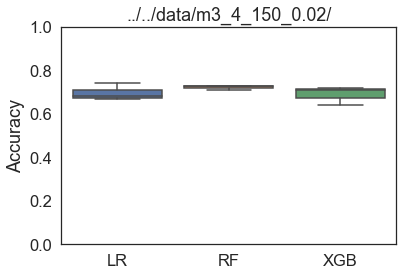

 model saved
 model saved
 model saved
lr average: 0.6 ;  rf average: 0.63 ;  xgb_average: 0.59


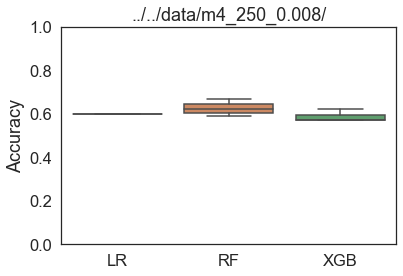

In [12]:
output = list(map(run_ml, processed_emb_dfs, ['']*5, [True]*5, output_dirs))

# Getting the feature importances and the dimensions that make up 20% of feature importances

In [7]:
feat_importance_data = list(map(plot_feature_importances, output_dirs, [0.5]*len(output_dirs), [False]*len(output_dirs), [False]*len(output_dirs), [True]*len(output_dirs)))

In [8]:
# feat_importance_data is made up of feature coefficients and top dimensions for each set of coefficients so this step is to split the data. The loop is for 5 embeddings so 5 results.
feat_importance_list = [feat_importance_data[i][0] for i in range(len(feat_importance_data))]
top_dim_list = [feat_importance_data[i][1] for i in range(len(feat_importance_data))]

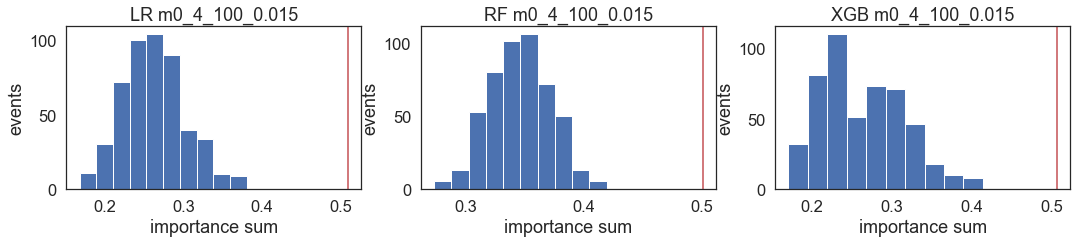

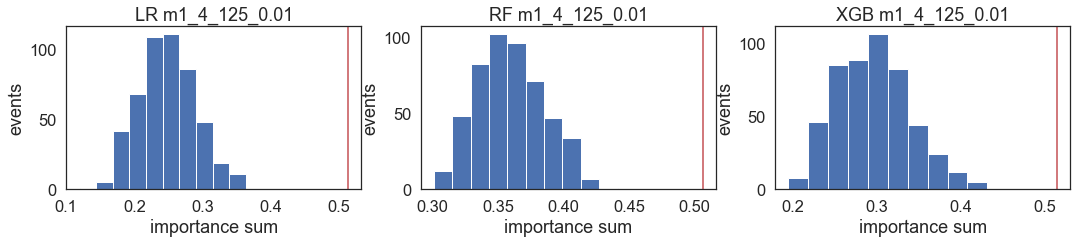

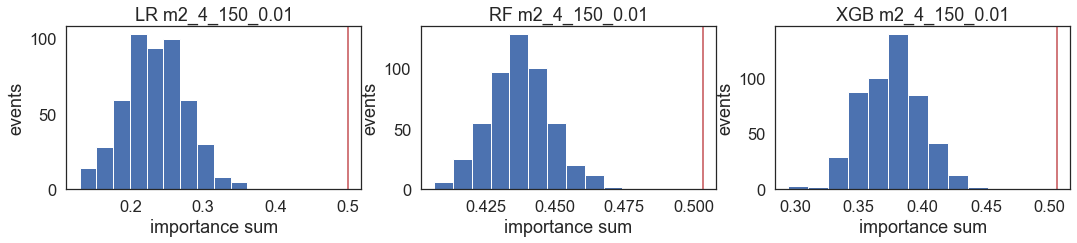

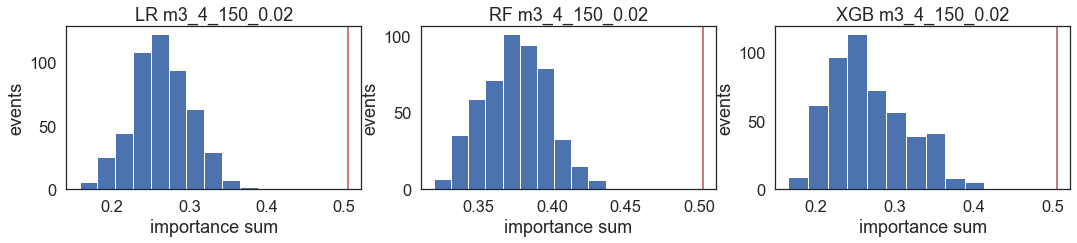

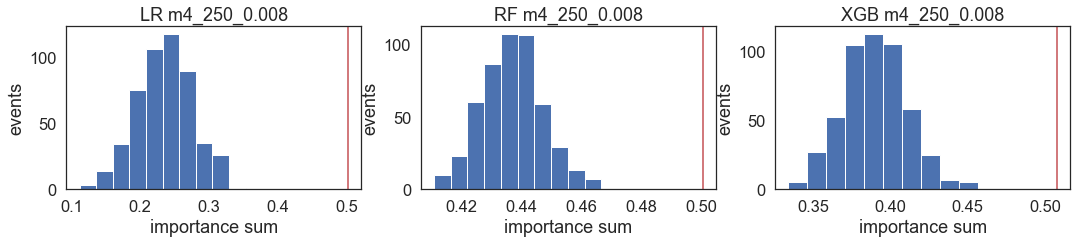

In [9]:
# The blue bars are the feature importance sum from random selection of the dimensions
# The red vertical line is the actual feature importance sum selected by ML
# Note each model was repeated 3 times but only 1 was shown
random_importance = list(map(plot_random_feature_importance, feat_importance_list, top_dim_list, subnetwork_names))

## Determine jaccard similarity between the "important dimensions" for the repeats of the model

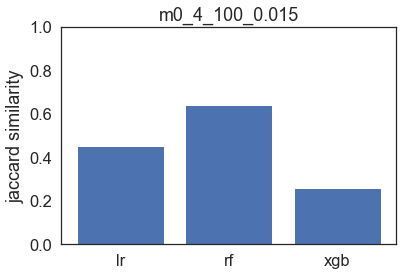

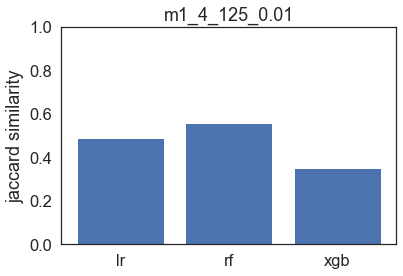

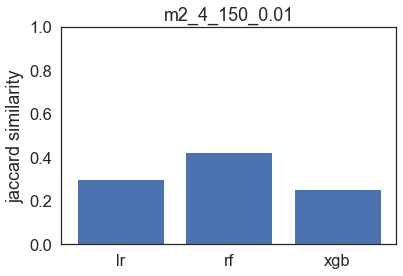

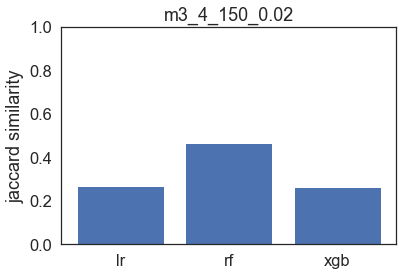

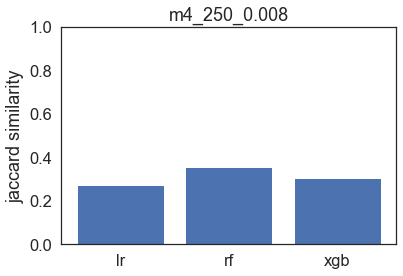

In [10]:
jaccard = list(map(jaccard_average, top_dim_list, subnetwork_names))

# Identify critical genes from the parameters used (5 embeddings, 3 models, 3 repeats)

In [61]:
# get critical gene sets, a set for each embedding, each set contains 9 lists
critical_gene_sets = list(map(get_critical_gene_sets, processed_emb_dfs, top_dim_list, [4]*len(processed_emb_dfs))) # 4 is arbituary (based on min mean and max mean)
# turn critical gene sets into dfs, 1 df per embedding, each df has 9 sets of data
critical_gene_dfs = list(map(get_critical_gene_df, critical_gene_sets))

Max mean: 13.898528172393387 Min mean: 0.043149803721997386
Max mean: 16.398268233126636 Min mean: 0.044170365378241164
Max mean: 16.028621596232995 Min mean: 0.05503939799913352
Max mean: 13.730728556736926 Min mean: 0.05113685687253896
Max mean: 13.884002146256556 Min mean: 0.05613601815236588


In [81]:
from itertools import combinations
def jaccard_critical_genes(critical_gene_df, network_name):
    '''
    jaccard similarity between top 10 critical genes identified by each model
    '''
    critical_gene_df['lr'] = critical_gene_df['LR_repeat1'] + critical_gene_df['LR_repeat2'] + critical_gene_df['LR_repeat3']
    critical_gene_df['rf'] = critical_gene_df['RF_repeat1'] + critical_gene_df['RF_repeat2'] + critical_gene_df['RF_repeat3']
    critical_gene_df['xgb'] = critical_gene_df['XGB_repeat1'] + critical_gene_df['XGB_repeat2'] + critical_gene_df['XGB_repeat3']
    cols_to_permute = ['lr', 'rf', 'xgb']
    jaccard_list = []
    model_names = []
    for col1, col2 in combinations(cols_to_permute, 2):
        top10_1 = critical_gene_df.sort_values(col1, ascending = False)['gene'][:10]
        top10_2 = critical_gene_df.sort_values(col2, ascending = False)['gene'][:10]
        jaccard_list.append(jaccard_similarity(top10_1, top10_2))
        model_names.append(f'{col1} vs {col2}')
        
    plt.bar(model_names, jaccard_list)
    plt.title(network_name)
    plt.ylabel('jaccard similarity')
    plt.ylim(0, 1)
    plt.show()
    plt.close()
    
    model_sets = [set(critical_gene_df.sort_values(col1, ascending = False)['gene'][:10]) for col in cols_to_permute]
    intersect_genes = set.intersection(*model_sets)
    return intersect_genes

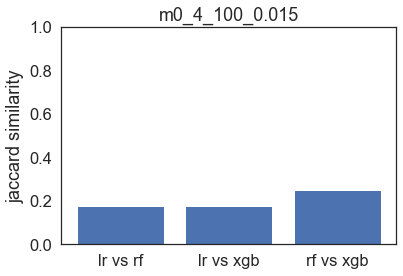

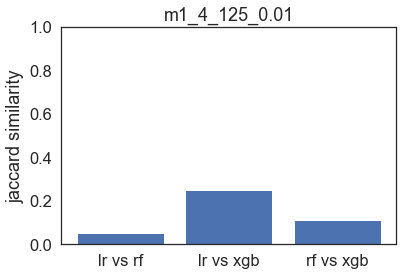

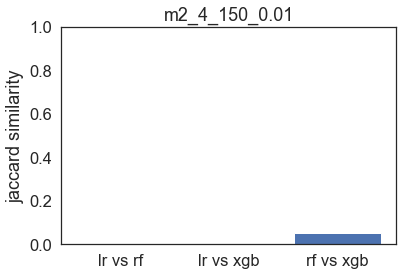

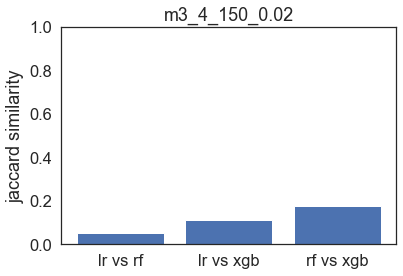

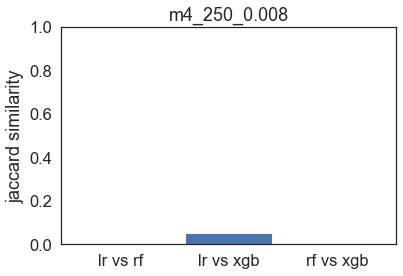

In [83]:
intersect_gene_list = list(map(jaccard_critical_genes, critical_gene_dfs, subnetwork_names))

## Plot number of nearby impact genes to the critical genes. 1 figure per embedding

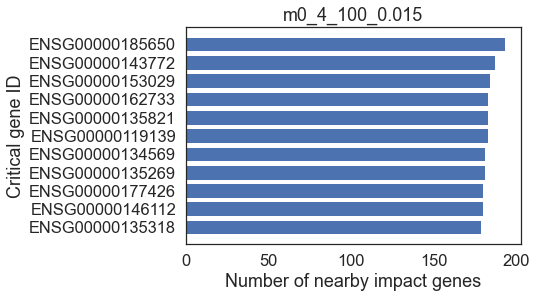

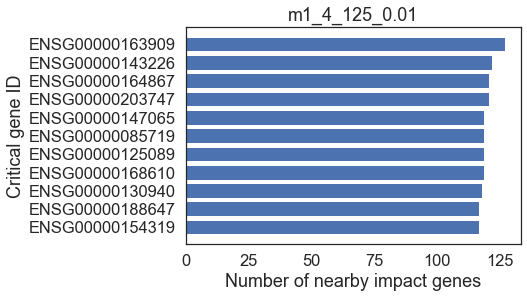

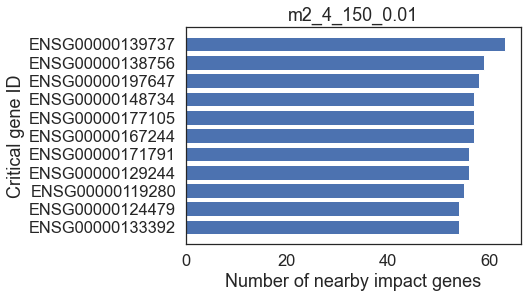

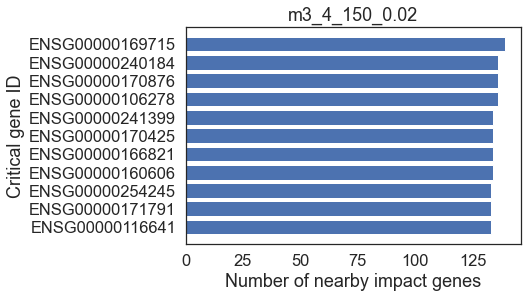

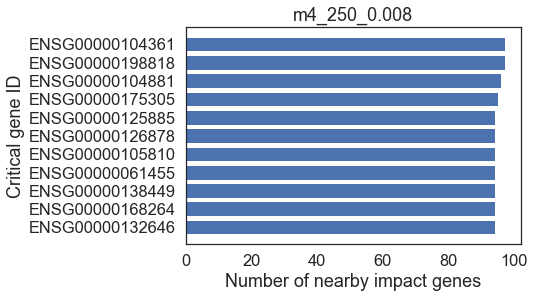

In [89]:
# critical_gene_sets2 is different from critical_gene_sets in that it only has 
critical_gene_sets2 = list(map(plot_nearby_impact_num, critical_gene_dfs, subnetwork_names))

## Plot each set of critical genes and their correlation with alcohol traits. Each gene set is from 1 embedding

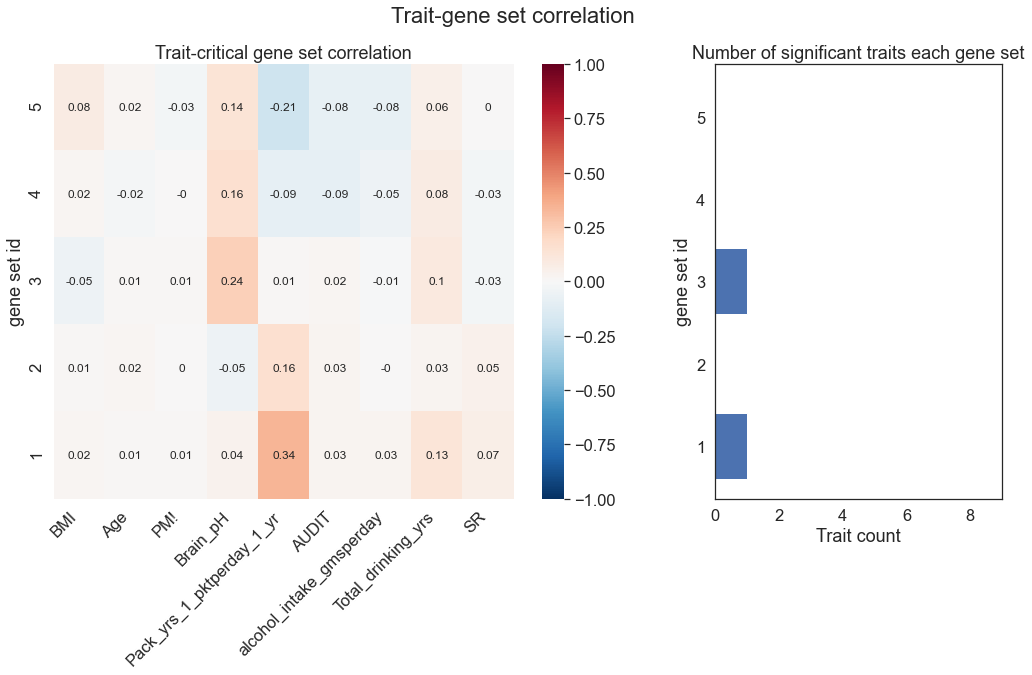

In [91]:
# Plot correlation of sets of critical genes found in common in 3 models for each embedding
gene_set_phenotype_corr(intersect_gene_list)

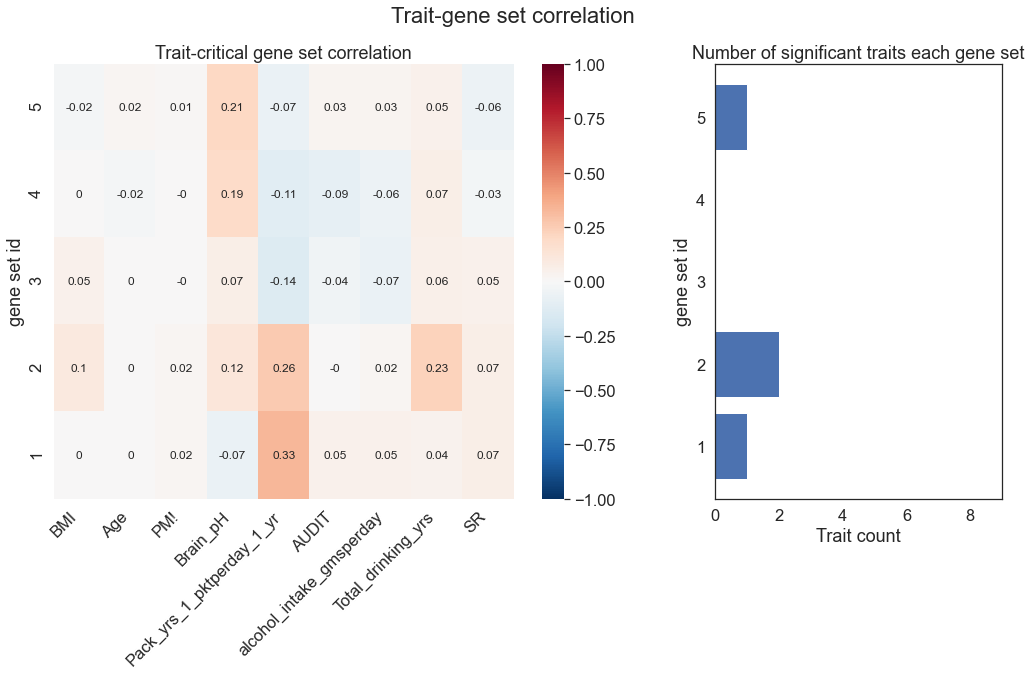

In [90]:
# Plot correlation of top critical genes (with most nearby impact genes) for each embedding
gene_set_phenotype_corr(critical_gene_sets2)